In [4]:
import torch
import numpy as np
from src.MLP import MultiLayerPerceptron as MLP
import pandas as pd
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

In [5]:
#data = pd.read_csv('processed_data/no_update.csv')
#data = pd.read_csv('processed_data/2000_update.csv')
#data = pd.read_csv('processed_data/5000update_100threshold.csv')
#data = pd.read_csv('processed_data/15000update.csv')
#data = pd.read_csv('processed_data/25000update.csv')

tensor(18.4277, grad_fn=<AddBackward0>)
tensor(16.0561, grad_fn=<AddBackward0>)
tensor(15.7945, grad_fn=<AddBackward0>)
tensor(15.6006, grad_fn=<AddBackward0>)
tensor(15.4061, grad_fn=<AddBackward0>)
tensor(15.2710, grad_fn=<AddBackward0>)
tensor(15.1447, grad_fn=<AddBackward0>)
tensor(14.9024, grad_fn=<AddBackward0>)
tensor(14.8092, grad_fn=<AddBackward0>)
tensor(14.6538, grad_fn=<AddBackward0>)
0.6806844547563805 0.646189024390244 0.8119134265466386 0.7196333078686019


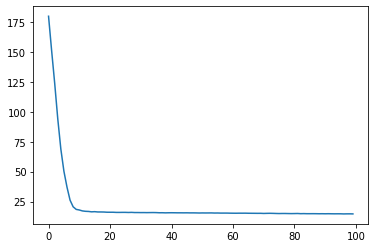

In [6]:
path = 'processed_data/' + '1' +'th5000_update.csv'
data=pd.read_csv(path)

one_hot = pd.read_csv('processed_data/one_hot.csv')
data['one_hot']= one_hot['New_occur']



train_size = int(0.7*len(data))
dataX = data[['Degree_difference','Max_degree', 'Avg_degree', 'MIN_distance', 'Avg_cluster_coef',
             'Avg_jaccard', 'Hyper_jaccard', 'Adamic_adar','one_hot']]
dataY = data[['Answer']]

trainX= torch.Tensor(dataX[:train_size].values)
testX = torch.Tensor(dataX[train_size:].values)
trainY= torch.Tensor(dataY[:train_size].values)
testY = torch.Tensor(dataY[train_size:].values)
train_data = torch.utils.data.TensorDataset(trainX, trainY)
test_data = torch.utils.data.TensorDataset(testX, testY)
trainloader = DataLoader(train_data ,batch_size=1000, shuffle=True)
testloader = DataLoader(test_data ,batch_size=1000, shuffle=False)

model = MLP(input_dimension = 9,
           output_dimension = 1,
           num_neurons = [64, 64],
           activation='mish',
           out_activation='Sigmoid',
           dropout_probability=0.1)
epochs = 100
lr = 1e-3

opt = torch.optim.Adam(model.parameters(), lr)
criterion = torch.nn.BCELoss()

loss_record = []
for epoch in range(1,epochs+1):
    total_loss = 0 

    for x, y in trainloader:
        output = model(x)
        loss = criterion(output, y)
        opt.zero_grad()
        loss.backward()
        opt.step()
        total_loss += loss

    loss_record.append(total_loss)
    if epoch % 10 == 0:
        print(total_loss)

plt.plot(loss_record)

tp = 0
fp = 0
tn = 0
fn = 0

PRED = []
for x, y in testloader:
    pred = model(x)
    pred = torch.round(pred)

    tp += torch.sum((pred==1) & (y==1))
    fn += torch.sum((pred==0) & (y==1))
    fp += torch.sum((pred==1) & (y==0))
    tn += torch.sum((pred==0) & (y==0))

    PRED = PRED + [answer.item() for answer in pred.flatten()]



acc = np.array(tp+tn)/np.array((tp+tn+fp+fn))
precison = np.array(tp)/np.array((tp+fp))
recall = np.array(tp)/np.array((tp+fn))
f1_score = 2*precison*recall/(precison+recall)


# with open('result/'+str(i) + "file.txt", "w") as f:
#     for s in PRED:
#         if s==1:
#             s='True'
#         else:
#             s='False'
#         f.write(str(s) +"\n")


In [7]:
print(acc,precison, recall, f1_score)


0.6806844547563805 0.646189024390244 0.8119134265466386 0.7196333078686019
